Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset.

In [2]:
data = pd.read_csv("beer.csv")

In [3]:
data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
data.shape

(476, 2)

In [5]:
data.Month = pd.to_datetime(data.Month)

In [6]:
data = data.set_index("Month")
data.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


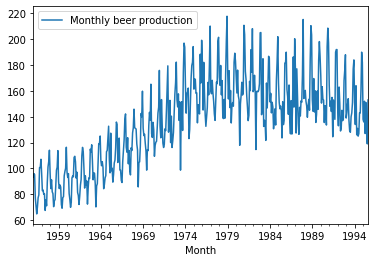

In [7]:
%matplotlib inline
data.plot()

<Figure size 864x576 with 0 Axes>

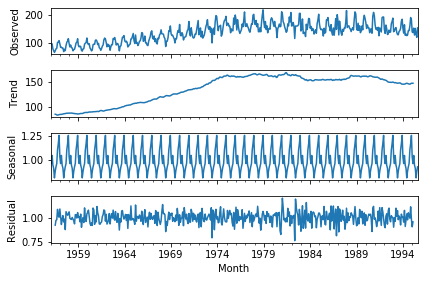

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt  
plt.figure(figsize=(12, 8))  
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()

 One simple approach is to perform a grid search over multiple values of p,d,q,P,D,and Q using some sort of performance criteria. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data

In [9]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3474.251, BIC=3494.939, Fit time=4.415 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4012.558, BIC=4020.833, Fit time=0.084 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3818.509, BIC=3835.060, Fit time=1.363 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3484.024, BIC=3500.575, Fit time=4.825 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4010.558, BIC=4014.696, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3640.959, BIC=3657.510, Fit time=1.369 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3468.503, BIC=3493.329, Fit time=8.124 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3581.675, BIC=3602.364, Fit time=2.466 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=3467.552, BIC=3496.516, Fit time=20.115 seconds
Fit ARIMA: order=(1, 1, 1) 

In [10]:
train_data = data[:len(data)-12]
test_data = data[len(data)-12:]

In [11]:
train_data[0:10]

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


In [12]:
test_data.shape

(12, 1)

In [13]:
test_data[0:10]

,Monthly beer production
Month,
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0
1994-12-01,182.0
1995-01-01,138.0
1995-02-01,136.0
1995-03-01,152.0
1995-04-01,127.0
1995-05-01,151.0


In [14]:
stepwise_model.fit(train_data)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [15]:
future_forecast = stepwise_model.predict(n_periods=12)
# This returns an array of predictions:>>>
print(future_forecast)

[133.02814267 159.31860169 178.87884306 182.24385733 142.97908159
 138.22487366 147.87010756 134.36947277 134.70698327 116.46635764
 128.99555661 137.40211671]


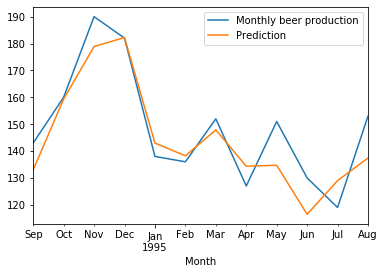

In [16]:
future_forecast = pd.DataFrame(future_forecast, index = test_data.index, columns=['Prediction'])
pd.concat([test_data,future_forecast],axis=1).plot()

<Figure size 1080x720 with 0 Axes>

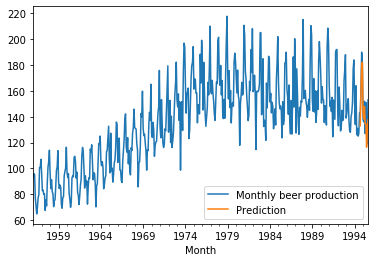

In [17]:
plt.figure(figsize=(15, 10))  
pd.concat([data,future_forecast],axis=1).plot()

Another approach by setting the values of p d q to max.

In [18]:
auto_arima(data['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  476
Model:             SARIMAX(3, 1, 4)x(2, 0, 2, 12)   Log Likelihood               -1729.378
Date:                            Mon, 17 Feb 2020   AIC                           3484.756
Time:                                    17:25:13   BIC                           3538.879
Sample:                                         0   HQIC                          3506.040
                                            - 476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.004      0.031      0.976      -0.007       0.007
ar.L1         -0.3276      0.033     -9.919      0.000      -0.392      -0.263
ar.L2         -0.0466      0.037     -1.244      0.213      -0.120       0.027
ar.L3          0.8147      0.034     23.867      0.000       0.748       0.882
ma.L1         -0.7403      0.031    -24.018      0.000      -0.801      -0.680
ma.L2         -0.1987      0.033     -6.076      0.000      -0.263      -0.135
ma.L3         -0.7888      0.031    -25.789      0.000      -0.849      -0.729
ma.L4          0.8512      0.031     27.473      0.000       0.790       0.912
ar.S.L12       0.0535      0.096      0.556      0.578      -0.135       0.242
ar.S.L24       0.9432      0.096      9.834      0.000       0.755       1.131
ma.S.L12       0.1050      0.097      1.080      0.280      -0.086       0.296
ma.S.L24      -0.8387      0.089     -9.426      0.000      -1.013      -0.664
sigma2        79.1163      4.209     18.795      0.000      70.866      87.366
===================================================================================
Ljung-Box (Q):                       52.09   Jarque-Bera (JB):                80.16
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
import statsmodels.api as sm
sm.tsa.statespace.SARIMAX

statsmodels.tsa.statespace.sarimax.SARIMAX

In [24]:
arima_model = sm.tsa.SARIMAX(train_data['Monthly beer production'], order = (3,1,4), seasonal_order = (2,0,2,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Monthly beer production   No. Observations:                  464
Model:             SARIMAX(3, 1, 4)x(2, 0, 2, 12)   Log Likelihood               -1688.532
Date:                            Mon, 17 Feb 2020   AIC                           3401.064
Time:                                    17:36:28   BIC                           3450.717
Sample:                                01-01-1956   HQIC                          3420.611
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3328      0.049     -6.811      0.000      -0.429      -0.237
ar.L2         -0.0456      0.055     -0.823      0.411      -0.154       0.063
ar.L3          0.8069      0.048     16.857      0.000       0.713       0.901
ma.L1         -0.7441      0.038    -19.502      0.000      -0.819      -0.669
ma.L2         -0.1952      0.036     -5.413      0.000      -0.266      -0.125
ma.L3         -0.7710      0.036    -21.471      0.000      -0.841      -0.701
ma.L4          0.8320      0.033     24.967      0.000       0.767       0.897
ar.S.L12       0.0767      0.048      1.587      0.113      -0.018       0.171
ar.S.L24       0.9186      0.049     18.745      0.000       0.823       1.015
ma.S.L12       0.1398      0.045      3.115      0.002       0.052       0.228
ma.S.L24      -0.7828      0.054    -14.387      0.000      -0.889      -0.676
sigma2        75.2593      3.823     19.688      0.000      67.767      82.751
===================================================================================
Ljung-Box (Q):                       54.78   Jarque-Bera (JB):                89.78
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               3.73   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
arima_pred = arima_result.predict(start = len(train_data), end = len(data)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.004241
1994-10-01    158.350738
1994-11-01    179.545118
1994-12-01    179.597249
1995-01-01    141.279747
1995-02-01    139.369560
1995-03-01    147.201615
1995-04-01    134.621467
1995-05-01    134.156306
1995-06-01    117.293390
1995-07-01    129.389032
1995-08-01    137.695544
Freq: MS, Name: ARIMA Predictions, dtype: float64

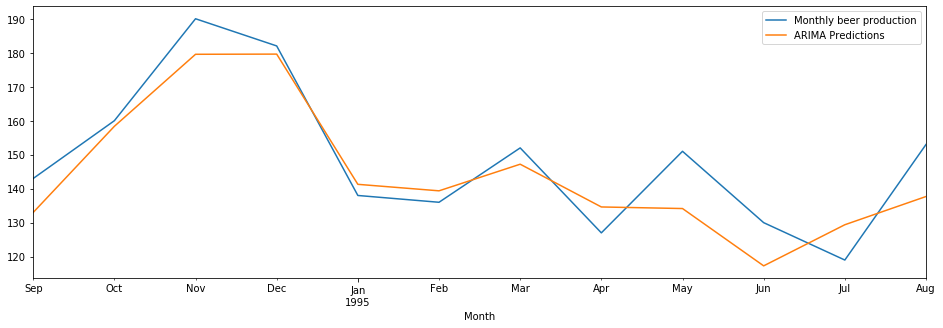

In [28]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [30]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [31]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = data['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 92.35510676518368
RMSE Error: 9.61015643812231
Mean: 136.39537815126045


In [32]:
test_data['ARIMA_Predictions'] = arima_pred

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test_data.head()

,Monthly beer production,ARIMA_Predictions
Month,,
1994-09-01,143.0,133.004241
1994-10-01,160.0,158.350738
1994-11-01,190.0,179.545118
1994-12-01,182.0,179.597249
1995-01-01,138.0,141.279747


Thank you